# 推定入門

In [2]:
import numpy as np
import pandas as pd

## 母平均の区間推定(母集団の分散が未知の場合)

In [1]:
import sys
import numpy as np
import pandas as pd
from sklearn import tree

In [ ]:
pd.DataFrame()

In [5]:
from scipy.stats import binom

help(binom.interval)

Help on method interval in module scipy.stats._distn_infrastructure:

interval(alpha, *args, **kwds) method of scipy.stats._discrete_distns.binom_gen instance
    Confidence interval with equal areas around the median.
    
    Parameters
    ----------
    alpha : array_like of float
        Probability that an rv will be drawn from the returned range.
        Each value should be in the range [0, 1].
    arg1, arg2, ... : array_like
        The shape parameter(s) for the distribution (see docstring of the
        instance object for more information).
    loc : array_like, optional
        location parameter, Default is 0.
    scale : array_like, optional
        scale parameter, Default is 1.
    
    Returns
    -------
    a, b : ndarray of float
        end-points of range that contain ``100 * alpha %`` of the rv's
        possible values.



## 平均の推定

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
%matplotlib inline

df = pd.read_csv('./archive/kaggle_income.csv', encoding='ISO-8859-1')
df.head()

,id,State_Code,State_Name,State_ab,County,City,Place,Type,Primary,Zip_Code,Area_Code,ALand,AWater,Lat,Lon,Mean,Median,Stdev,sum_w
0,1011000,1,Alabama,AL,Mobile County,Chickasaw,Chickasaw city,City,place,36611,251,10894952,909156,30.771450,-88.079697,38773,30506,33101,1638.260513
1,1011010,1,Alabama,AL,Barbour County,Louisville,Clio city,City,place,36048,334,26070325,23254,31.708516,-85.611039,37725,19528,43789,258.017685
2,1011020,1,Alabama,AL,Shelby County,Columbiana,Columbiana city,City,place,35051,205,44835274,261034,33.191452,-86.615618,54606,31930,57348,926.031000
3,1011030,1,Alabama,AL,Mobile County,Satsuma,Creola city,City,place,36572,251,36878729,2374530,30.874343,-88.009442,63919,52814,47707,378.114619
4,1011040,1,Alabama,AL,Mobile County,Dauphin Island,Dauphin Island,Town,place,36528,251,16204185,413605152,30.250913,-88.171268,77948,67225,54270,282.320328


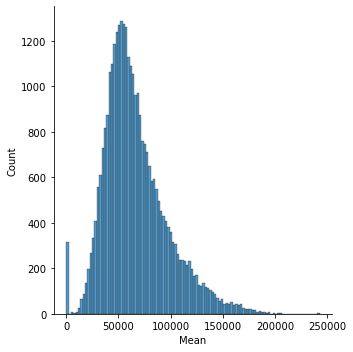

In [4]:
sns.distplot(df['Mean'], kde=False)

In [13]:
import numpy as np

np.mean(df['Mean'])

66703.98604193568

In [14]:
n = 1000
sample_df = df.sample(n=n)

/Users/kohta/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Mean', ylabel='Density'>

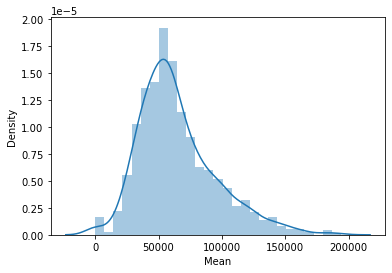

In [15]:
sns.distplot(sample_df['Mean'])

In [16]:
# 標本平均
np.mean(sample_df['Mean'])

64797.432

In [18]:
from scipy import stats

sample_mean = np.mean(sample_df['Mean'])
sample_var = stats.tvar(sample_df['Mean'])
stats.norm.interval(alpha=0.95, loc=sample_mean, scale=np.sqrt(sample_var/n))

(62891.94744032188, 66702.91655967812)

## t分布による平均の区間推定

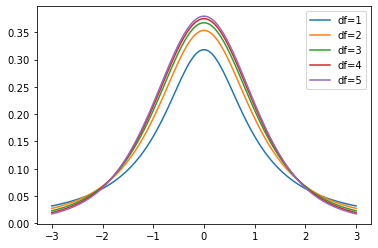

In [5]:
# t分布を見てみる

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

x = np.linspace(-3, 3, 100)
for df in range(1, 6):
    t = stats.t.pdf(x, df)
    plt.plot(x, t, label=f"df={df}")
plt.legend()


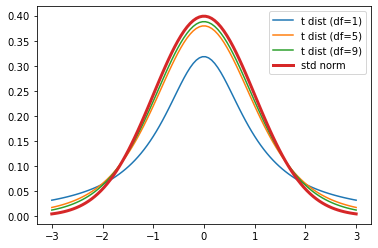

In [7]:
# 標準正規分布と比較
x = np.linspace(-3, 3, 100)
z = stats.norm.pdf(x, loc=0, scale=1)
for df in range (1, 10, 4):
    t = stats.t.pdf(x, df)
    plt.plot(x, t, label=f"t dist (df={df})")
plt.plot(x, z, label='std norm', linewidth=3)
plt.legend()

上記の結果より、標本数(すなわち自由度)が大きくなると、t分布は,
標準正規分布に近似していく

In [12]:
# 標本を作成して、平均の値を確認
n = 1000
sample_df = df.sample(n=n)
print(f"母集団の平均：{np.mean(df['Mean'])}")
print(f"標本平均：{np.mean(sample_df['Mean'])}")

母集団の平均：66703.98604193568
標本平均：66875.617


In [13]:
from scipy import stats
sample_mean = sample_df['Mean'].mean()
sample_std = stats.tstd(sample_df['Mean'])
stats.t.interval(alpha=0.95, loc=sample_mean, scale=sample_std/np.sqrt(n), df=n-1)

(64971.56224686477, 68779.67175313523)

In [5]:
import numpy as np
import pandas as pd